In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from scipy import stats

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv",names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
#to display statistical summary of the data
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [25]:
#finding the columns having missing data
df.replace('?',np.nan,inplace=True)
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [26]:
#transform required datatypes
df["normalized-losses"]=df["normalized-losses"].astype("float")
df["bore"]=df["bore"].astype("float")
df["stroke"]=df["stroke"].astype("float")
df["price"]=df["price"].astype("float")
df["peak-rpm"]=df["peak-rpm"].astype("float")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [27]:
#removing missing data

m1=df["normalized-losses"].mean()
df["normalized-losses"]=df["normalized-losses"].replace(np.nan,m1)
m2=df["bore"].mean()
df["bore"]=df["bore"].replace(np.nan,m2)
m3=df["stroke"].mean()
df["stroke"]=df["stroke"].replace(np.nan,m3)
newhorsepower=df["horsepower"].astype("float").mean()
df["horsepower"].replace(np.nan,newhorsepower,inplace=True)
newprpm=df["peak-rpm"].mean()
df["peak-rpm"].replace(np.nan,newprpm,inplace=True)

fdoor=df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan,fdoor,inplace=True)

df=df.dropna(subset=["price"],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [28]:
#standarizing data
#convert city-mpg and highway-mpg to L/100km
df["city-mpg"]=235/df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100km"},inplace=True)
df["highway-mpg"]=235/df["highway-mpg"]
df.rename(columns={"highway-mpg":"highway-L/100km"},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


In [29]:
df['curb-weight'].head()

0    2548
1    2548
2    2823
3    2337
4    2824
Name: curb-weight, dtype: int64

In [7]:
#data normalization
#simple feature scaling of length,width,height
df["length"]=df["length"]/df["length"].max()
df["width"]=df["width"]/df["width"].max()
df["height"]=df["height"]/df["height"].max()

In [8]:
#Binning the data (horsepower)
df["horsepower"]=df["horsepower"].astype("int")
bins=np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)
groups=["Low","Medium","High"]
df["horsepower-binned"]=pd.cut(df["horsepower"],bins,labels=groups,include_lowest=True)
print(df["horsepower-binned"].value_counts())
df[['horsepower','horsepower-binned']].head(20)

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Text(0.5, 1.0, 'horsepower bins')

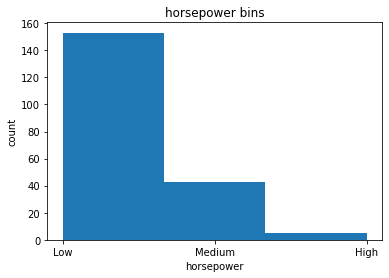

In [9]:
#Historgram of attribute horsepower-binned with bins = 3
plt.pyplot.hist(df["horsepower-binned"], bins = 3)

# set x,y labels and title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [10]:
#converting fuel-type and aspiration to numerical attribute
newfuel=pd.get_dummies(df["fuel-type"])
newfuel.rename(columns={"gas":"fuel-type:gas","diesel":"fuel-type:diesel"},inplace=True)
df=pd.concat([df,newfuel],axis=1)
df.drop("fuel-type",axis=1,inplace=True)

newasp=pd.get_dummies(df["aspiration"])
newasp.rename(columns={"std":"aspiration:std","turbo":"aspiration:turbo"},inplace=True)
df=pd.concat([df,newasp],axis=1)
df.drop("aspiration",axis=1,inplace=True)
df.head()
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type:diesel,fuel-type:gas,aspiration:std,aspiration:turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


DATA CLEANING DONE!!
--------------------------------------------------------------------------------------------------------------------------------------

NOW LETS EXPLORE THE DATA AND FIND USEFUL INFORMATION
-------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='body-style', ylabel='price'>

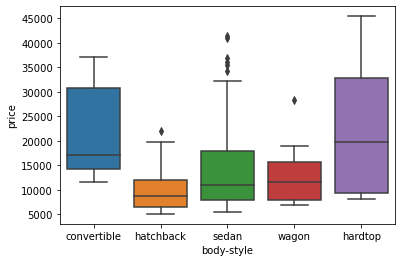

In [11]:
import seaborn as sns
sns.boxplot(x="body-style",y="price",data=df)

Text(0.5, 1.0, 'Engine-size V/S Price')

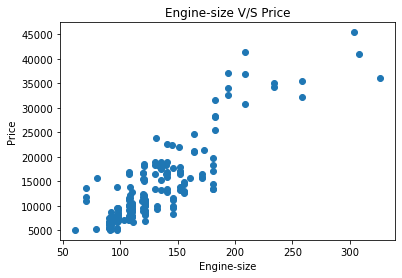

In [12]:
pyplot.scatter(x=df["engine-size"],y=df["price"])
pyplot.xlabel("Engine-size")
pyplot.ylabel("Price")
pyplot.title("Engine-size V/S Price")

In [13]:
#COMPARING MULTIPLE VARIABLES USING GROUP BY
df_test=df[["drive-wheels","body-style","price"]]
df_group=df_test.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [14]:
#PIVOT TABLE
df_pivot=df_group.pivot(index='drive-wheels',columns='body-style',values=["price"])
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

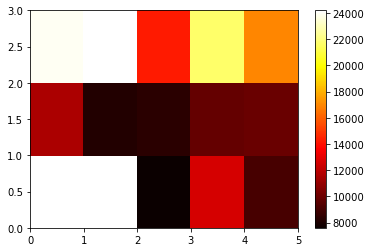

In [15]:
#HEAT MAP
pyplot.pcolor(df_pivot,cmap='hot')
pyplot.colorbar()
pyplot.show()

In [16]:
#FINDING THE IMPORTANT VARIABLES WHICH AFFECT PRICE USING CORRELATION ANALYSIS
print("IMPORTANT ATTRIBUTES")
print("")
print("NUMERICAL ATTRIBUTES")

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("HORSEPOWER: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("CURB-WEIGHT: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("ENGINE-SIZE: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("HIGHWAY-L/100KM: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
print("")

#APPLYING ANOVA TEST FOR CATEGORICAL VARIABLE DRIVE-WHEELS
print("CATEGORICAL ATTRIBUTES")
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "DRIVE-WHEELS: ANOVA results: F=", f_val, ", P =", p_val)   

IMPORTANT ATTRIBUTES

NUMERICAL ATTRIBUTES
HORSEPOWER: The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48
CURB-WEIGHT: The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P = 8.016477466158759e-30
ENGINE-SIZE: The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64
HIGHWAY-L/100KM: The Pearson Correlation Coefficient is 0.8011176263981975  with a P-value of P = 3.046784581041283e-46

CATEGORICAL ATTRIBUTES
DRIVE-WHEELS: ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [38]:
#MULTIPLE LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
Y=df['price']
lm.fit(X,Y)

LinearRegression()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


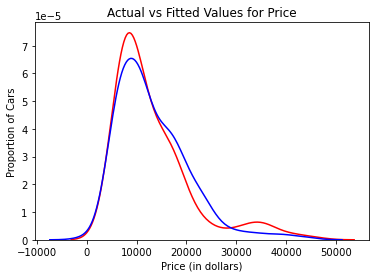

In [39]:
#TO VISUALIZE THE MODEL
Y_hat = lm.predict(X)
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)
pyplot.title('Actual vs Fitted Values for Price')
pyplot.xlabel('Price (in dollars)')
pyplot.ylabel('Proportion of Cars')
pyplot.show()

In [40]:
#NUMERICAL EVALUATION OF THE MODEL

# Find the R^2
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

#Find the mean squared error
from sklearn.metrics import mean_squared_error
y_predict=lm.predict(X)
mse=mean_squared_error(df['price'],y_predict)
print('The mean square error is: ',mse)

The R-square is:  0.8118005191488038
The mean square error is:  11826766.878324665


In [41]:
#Predicting for a sample data
#horsepower=154, curb-weight=2824, engine-size=152, highway-L/100km=9.04
lm.predict(np.array([154,2824,152,9.04]).reshape(1,-1))

array([18642.08204161])